# Non-prametric density estimation

In this part, we are going to implement below non-parametric estimstion methods:

* Histogram
* Parzen Window
* Gaussian kernel (Standard Deviations of 0.2,0.6,0.9)
* KNN Estimator (Fork=1,9,99)

Firstly, let's create our dataset.

In [3]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import math
from math import sqrt
from operator import add
from functools import reduce
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

In [4]:
# dataset creation

class DatasetGD():
    """
    if split_test_train == True:
        access data by "x_train", "y_train", "x_test", "y_test"
    else:
        access data by "x", "y"
    """
    def __init__(self, num_of_samples, mean, covariance, per, num_of_classes, 
                 shuffle=True, split_test_train=True, test_size=0.2):
        self.num_of_samples = num_of_samples
        self.mean = mean
        self.covariance = covariance
        self.per = per
        self.num_of_classes = num_of_classes
        
        self.generate_dataset(num_of_samples, mean, covariance, num_of_classes)
        
        # split test train dataset
        if split_test_train == True:
            self.split(shuffle, test_size)   
            
    def split(self, shuffle, test_size):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=test_size, shuffle=shuffle)
     
    def generate_dataset(self, num_of_samples, mean, covariance, num_of_classes, seed=1000):
        x_data = []        
        y_data = []
        for i in range(self.num_of_classes):
            self.mvd = multivariate_normal(cov = covariance[i], mean = mean[i], seed = seed)
            
            # generating 500 samples out of the distribution
            x_tmp = self.mvd.rvs(size = num_of_samples)
            y_tmp = np.array([i]*self.num_of_samples)
        
            x_data.append(x_tmp)
            y_data.append(y_tmp)
        
        # concatenate all x_datas and y_datas
        self.x = list(x_data[0]) + list(x_data[1]) + list(x_data[2])
        self.y = list(y_data[0]) + list(y_data[1]) + list(y_data[2])
        self.x = np.array(self.x)
        self.y = np.array(self.y).reshape(-1, 1)
        
    def plot_dataset(self, x_in, y_in):
        fig2 = plt.figure()
        ax2 = fig2.gca()
        
        x_ = pd.DataFrame(data=x_in, columns=["x1", "x2"])
        y = pd.DataFrame(data=y_in, columns=["y"])

        res = pd.concat([x_, y], axis=1, sort=False)
        class_0 = res[res['y'] == 0]
        class_1 = res[res['y'] == 1]
        class_2 = res[res['y'] == 2]

        ax2.scatter(class_0.iloc[:,0], class_0.iloc[:, 1], s=10, label='class-0', c='#64B952')
        ax2.scatter(class_1.iloc[:,0], class_1.iloc[:, 1], s=10, label='class-1', c='#8678AC')
        ax2.scatter(class_2.iloc[:,0], class_2.iloc[:, 1], s=10, label='class-2', c='#FF5300')
        ax2.set_title("Dataset Scatter Plot")
    
    def calculate_cov(self, x, y, mean_MLE):
        self.n = len(self.covariance[0])
        list_cov = []
        for class_ in range(self.num_of_classes):
            cov_ = np.zeros((self.n, self.n))
            count_ = 0
            for i in range(x.shape[0]):
                if int(y[i]) == class_:
                    temp = x[i] - mean_MLE[int(y[i])].reshape(1,-1)
                    cov_ += np.dot(temp.T, temp)
                    count_ += 1
            cov_ /= count_
            list_cov.append(cov_)
        return list_cov
    
    def calculate_mean(self, x , y):
        self.n = len(self.covariance[0])
        mean_ = np.zeros((self.num_of_classes, self.n))
        for i in range(self.num_of_classes):
            mean_[i] = np.mean(x[np.argwhere(y == i)[:,0]], axis = 0)
        return mean_
    
    def plot_pdf(self, x_in, y_in):
        mean_MLE = self.calculate_mean(x_in, y_in)

        fig = plt.figure()
        ax = fig.gca(projection='3d')
        
        fig2 = plt.figure()
        ax2 = fig2.gca()
        
        color = ['viridis' ,'plasma', 'cividis']
        
        sigma = self.calculate_cov(x_in , y_in , mean_MLE)
        
        for class_ in range(self.num_of_classes):
            meow = [mean_MLE[class_][0], mean_MLE[class_][1]]     # :)
            sigma_c = sigma[class_]
            
            x = np.linspace(meow[0] - 4 * sigma_c[0][0], meow[0] + 4 * sigma_c[0][0], 200).flatten()
            y = np.linspace(meow[1] - 4 * sigma_c[1][1], meow[1] + 4 * sigma_c[1][1], 200).flatten()

            X, Y = np.meshgrid(x,y)
            pos = np.empty(X.shape + (2,))
            pos[:, :, 0] = X
            pos[:, :, 1] = Y

            rv = multivariate_normal(meow, sigma_c)

            # Make a 3D plot
            ax.plot_surface(X, Y, rv.pdf(pos), cmap=color[class_], linewidth=0)
            ax.set_title('3D PDF Plot')
            
            # Make true PDF contour
            ax2.contour(X, Y, rv.pdf(pos), cmap='inferno')
            ax2.set_title("PDF Plot")
        
            
        data_join = np.c_[x_in, y_in]
        df = pd.DataFrame(data_join, columns = ['x1','x2','y'])
        sns.jointplot(data=df, x="x1", y="x2", hue="y", kind="kde", multiple='stack').fig.suptitle("True PDF Plot")

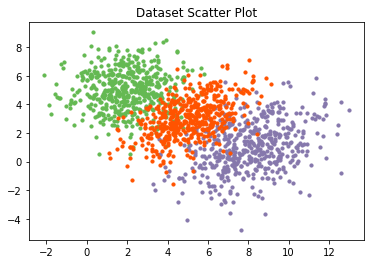

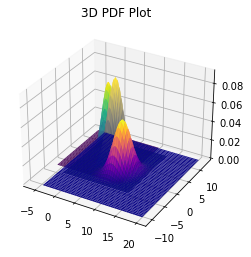

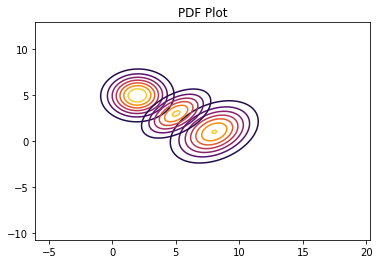

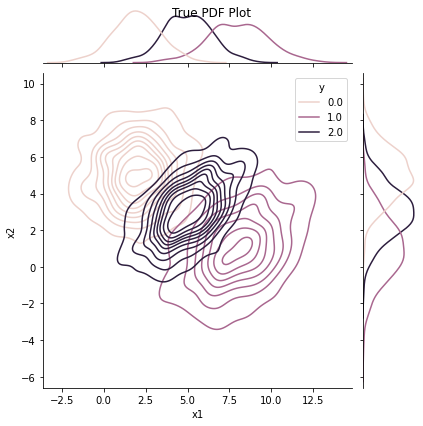

In [5]:
per = [1/3,1/3,1/3]
mean_1_class_1 = [2, 5]
covariance_1_class_1 = np.array([[2, 0], 
                                 [0, 2]])
mean_1_class_2 = [8, 1]
covariance_1_class_2 = np.array([[3, 1], 
                                 [1, 3]])
mean_1_class_3 = [5, 3]
covariance_1_class_3 = np.array([[2, 1], 
                                 [1, 2]])

mean_1 = []
mean_1.append(mean_1_class_1)
mean_1.append(mean_1_class_2)
mean_1.append(mean_1_class_3)

covariance_1 = []
covariance_1.append(covariance_1_class_1)
covariance_1.append(covariance_1_class_2)
covariance_1.append(covariance_1_class_3)
# ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.

dataset = DatasetGD(num_of_samples=500, mean=mean_1, covariance=covariance_1, per=per, num_of_classes=3, split_test_train=False)
dataset.plot_dataset(dataset.x, dataset.y)
dataset.plot_pdf(dataset.x, dataset.y)

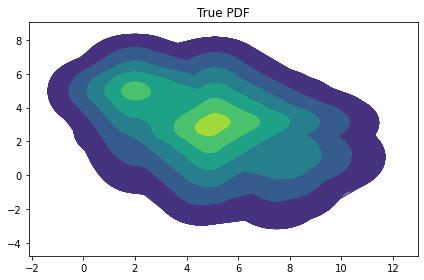

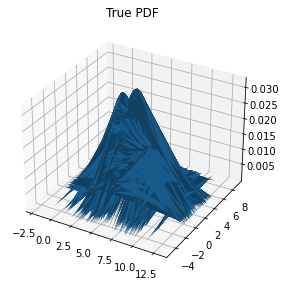

In [6]:
# calculate true density probability
def true_PDF(data, mu, cov, per):
    true_pdf = 0
    for i in range(len(mu)):
        true_pdf += (per[i] * multivariate_normal(mu[i], cov[i]).pdf(data))
    return true_pdf

x1 = dataset.x[:,0].reshape(-1, 1)
x2 = dataset.x[:,1].reshape(-1, 1)
x1x1, x2x2 = np.meshgrid(x1, x2)
x_data = np.concatenate([x1x1.ravel().reshape(-1, 1), x2x2.ravel().reshape(-1, 1)], axis=1)

z = true_PDF(x_data, dataset.mean, dataset.covariance, per)
zz = np.array(z).reshape(x1x1.shape)

fig, ax = plt.subplots(1)
ax.contour(x1x1, x2x2, zz)
ax.set_title('True PDF')
fig.tight_layout()
# ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x1x1, x2x2, zz)
ax.set_title('True PDF')
fig.tight_layout()

## KDE

Now, we want to define the kernel functions for calculating $P_{KDE}$.

There are diffrent kernel functions which we implement two of them in this assignment:

* Parzen window:
$$
K(u) =
 \
 \left\{
 \begin{aligned}
   1 & \ \ \ \ \ \ \ \ |u_j| < \frac {1}{2} \\
   0 & \ \ \ \ \ \ \ \ otherwise. \\
 \end{aligned}
 \right.
 \
$$
* Guassian:
$$
K(u, \sigma) = \frac {1}{\sqrt{2\pi\sigma^2}} \exp(\frac {-u^2}{2\sigma^2})$$

In [7]:
class KDE():
    def __init__(self, x_train, h, kernel_fn_name="gaussian", sigma=0.2):
        """
        x is the x_train
        h is the bin
        """
        self.bin = h
        self.sigma=sigma
        self.x_train = x_train
        self.x1_train = x_train[:, 0]
        self.x2_train = x_train[:, 1]

        self.kernel_fn_name = kernel_fn_name
    
    def generate_meshgrid_data(self, sample_size):
        # generate new x between min and max of dataset_x_train
        x = np.linspace(np.amin(self.x1_train), np.amax(self.x1_train), sample_size).reshape(-1, 1)
        y = np.linspace(np.amin(self.x2_train), np.amax(self.x2_train), sample_size).reshape(-1, 1)
        self.xx, self.yy = np.meshgrid(x, y)
        self.new_generated_x = np.concatenate([self.xx.ravel().reshape(-1, 1), self.yy.ravel().reshape(-1, 1)], axis=1)
        
    def parzen_window_kernel_fn(self, u):
        if np.abs(u) <= np.abs(1/2):
            return 1
        return 0
    
    def gaussian_kernel_fn(self, u, sigma):
        g_ = (1/(math.sqrt(2*math.pi) * sigma)) * math.exp(-(u**2)/(2*sigma**2))
        return g_
    
    # one commone way of performing multivariate probability density estimation -> product kernel
    def probability_density_fn(self, new_x, data_point):
        dimension = self.x_train.shape[1]
        product_result = 1
        for i in range(dimension):
            if self.kernel_fn_name == "parzen_window":
                product_result *= self.parzen_window_kernel_fn((new_x[i]-data_point[i])/self.bin)
            elif self.kernel_fn_name == "gaussian":
                product_result *= self.gaussian_kernel_fn((new_x[i]-data_point[i])/self.bin, self.sigma)
        return product_result

    def P_KDE(self, sample_size):
        # generate new x-sample meshgrid
        self.generate_meshgrid_data(sample_size)
        
        # P_PKDE (probability of product kernel density)
        N = self.x_train.shape[0]
        d = self.x_train.shape[1]  
        probs = []

        for new_x in self.new_generated_x:
            px = 1/N * 1/(self.bin**d) * np.sum([self.probability_density_fn(new_x, data_point) for data_point in self.x_train])
            probs.append(px) 

        return probs

## Creating dataset

In [8]:
per = [1/3,1/3,1/3]

mean_1_class_1 = [2, 5]
covariance_1_class_1 = np.array([[2, 0], 
                                 [0, 2]])
mean_1_class_2 = [8, 1]
covariance_1_class_2 = np.array([[3, 1], 
                                 [1, 3]])
mean_1_class_3 = [5, 3]
covariance_1_class_3 = np.array([[2, 1], 
                                 [1, 2]])

mean_1 = []
mean_1.append(mean_1_class_1)
mean_1.append(mean_1_class_2)
mean_1.append(mean_1_class_3)

covariance_1 = []
covariance_1.append(covariance_1_class_1)
covariance_1.append(covariance_1_class_2)
covariance_1.append(covariance_1_class_3)

dataset = DatasetGD(num_of_samples=500, mean=mean_1, covariance=covariance_1, per=per, num_of_classes=3, split_test_train=True, test_size=0.2)

dataset.x

array([[0.86232416, 5.45386575],
       [1.96396176, 5.9112115 ],
       [1.57460927, 5.5508002 ],
       ...,
       [2.16457226, 0.24769458],
       [4.89348743, 3.15949257],
       [4.61584427, 2.56676386]])

## Parzen window kernel

* h = 0.09 , 0.3, 0.6

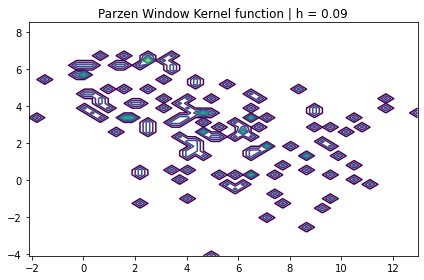

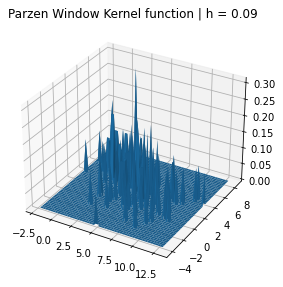

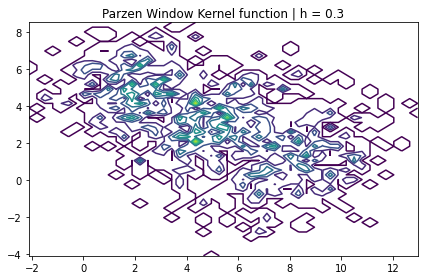

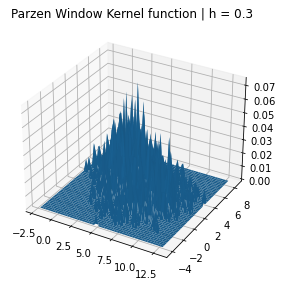

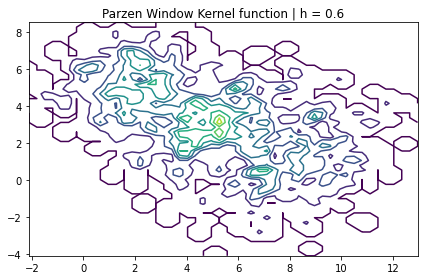

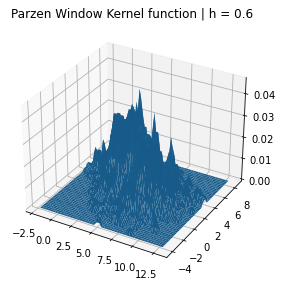

In [10]:
bins = [0.09, 0.3, 0.6]
sample_size = 50

parzen_window_probs = []
for b in bins:
    kde = KDE(dataset.x_train, b, "parzen_window", 0)
    probs = kde.P_KDE(sample_size)
    zz = np.array(probs).reshape(kde.xx.shape)
    parzen_window_probs.append(zz)

# plot estimated KDE
for i in range(len(bins)):
    fig, ax = plt.subplots(1)
    ax.contour(kde.xx, kde.yy, parzen_window_probs[i])
    ax.set_title('Parzen Window Kernel function | h = '+str(bins[i]))
    fig.tight_layout()
    # ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(kde.xx, kde.yy, parzen_window_probs[i])
    ax.set_title('Parzen Window Kernel function | h = '+str(bins[i]))
    fig.tight_layout()


## Gaussian kernel
* h = 0.09 , 0.3, 0.6
* $\sigma$ = 0.2, 0.6, 0.9

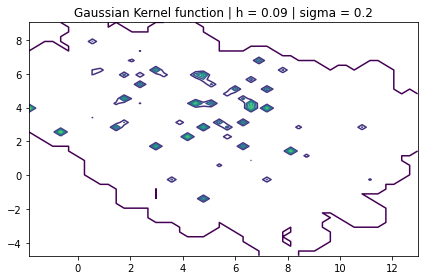

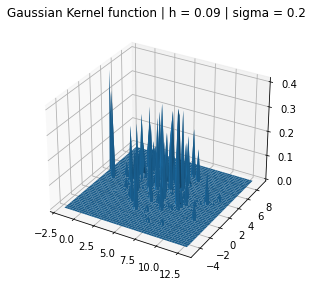

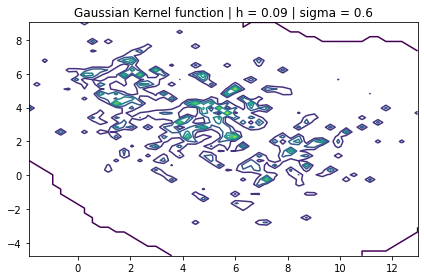

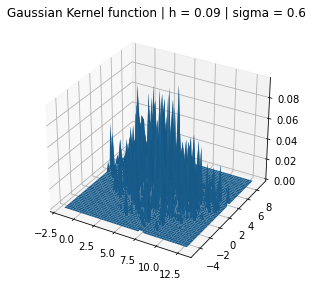

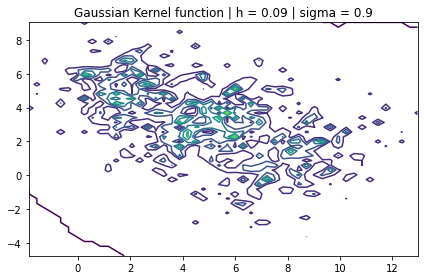

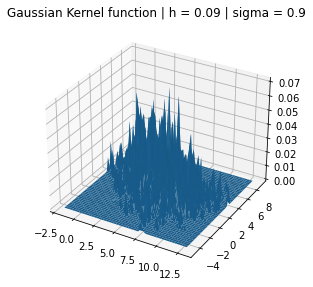

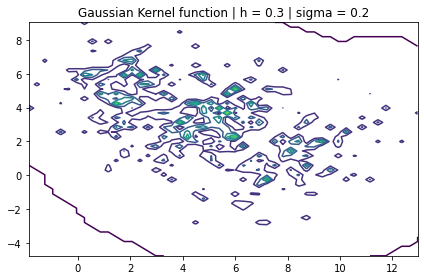

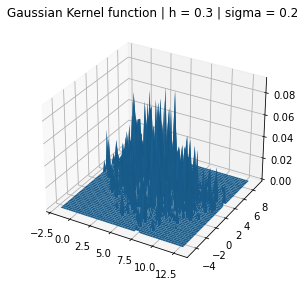

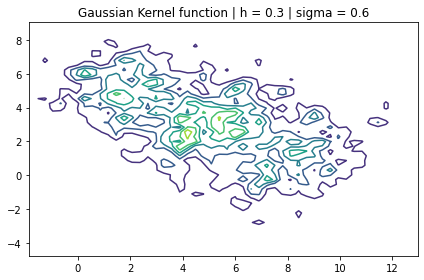

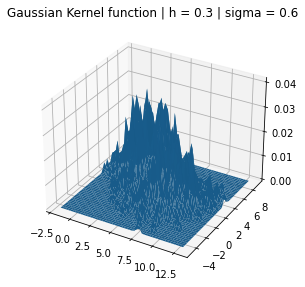

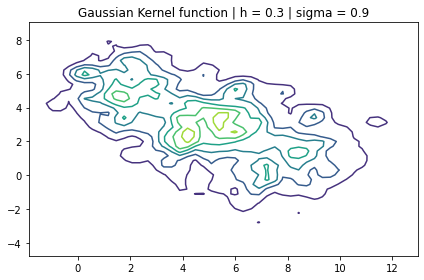

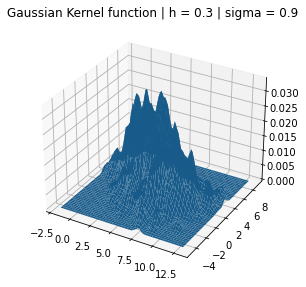

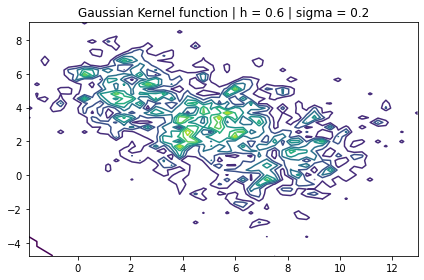

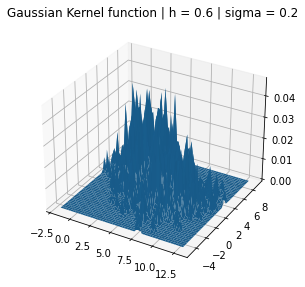

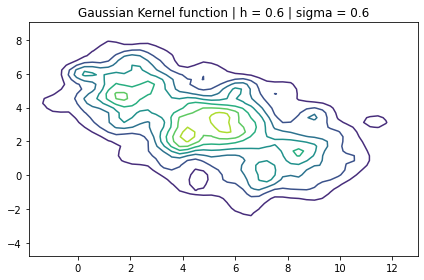

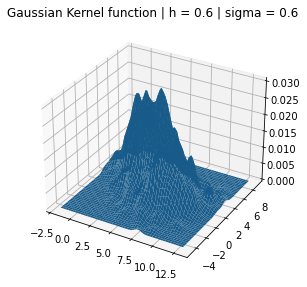

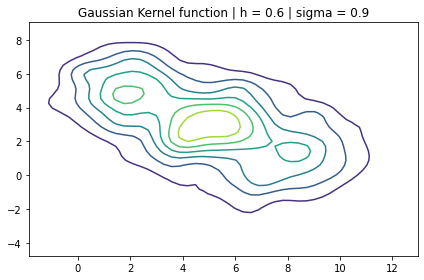

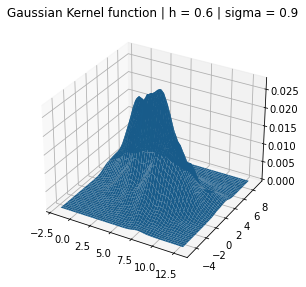

In [77]:
sigmas = [0.2, 0.6, 0.9]
bins = [0.09, 0.3, 0.6]

gaussian_probs = []
info_pairs = []
for b in bins:
    for s in sigmas:
        # create pairs
        info_pairs.append((b, s))
        kde = KDE(dataset.x_train, b, "gaussian", s)
        probs = kde.P_KDE()
        zz = np.array(probs).reshape(kde.xx.shape)
        gaussian_probs.append(zz)


# plot estimated KDE
for i in range(len(gaussian_probs)):
    fig, ax = plt.subplots(1)
    ax.contour(kde.xx, kde.yy, gaussian_probs[i])
    ax.set_title('Gaussian Kernel function | h = '+str(info_pairs[i][0])+' | sigma = '+str(info_pairs[i][1]))
    fig.tight_layout()
    # ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(kde.xx, kde.yy, gaussian_probs[i])
    ax.set_title('Gaussian Kernel function | h = '+str(info_pairs[i][0])+' | sigma = '+str(info_pairs[i][1]))
    fig.tight_layout()


## K-Fold

In this part, we are going to find best h for gaussian kernel-KDE woth 5-fold cross validation method.

In [21]:
class KFoldGaussianKDE():
    def __init__(self, dataset, min_h, max_h, step_h, k=5, sigma=0.6):
        self.x_data = dataset.x
        self.mu = dataset.mean
        self.cov = dataset.covariance
        self.per = dataset.per
        self.min_h = min_h
        self.max_h = max_h
        self.step_h = step_h
        self.k = k
        self.sigma = sigma
    
    def create_folds_indieces(self):
        folds = []
        fold_size = self.x_data.shape[0]/self.k
        for i in range(self.k):
            folds.append([int(i*fold_size),int(((i+1)*fold_size)) - 1])
        return folds

    def find_probability_square_error(self, true_prob, estimated_prob):
        error = np.linalg.norm(true_prob - estimated_prob)
        return error
    
    def gaussian_kernel_fn(self, u, sigma):
        g_ = (1/(math.sqrt(2*math.pi) * sigma)) * math.exp(-(u**2)/(2*sigma**2))
        return g_
    
    def kernel(self, dataPoint, x, h, sigma):
        dim = len(dataPoint)
        prod = 1
        for j in range(0, dim):
            prod *= self.gaussian_kernel_fn((x[j]-dataPoint[j])/h, sigma)
        return prod

    def generate_meshgrid_data(self, data, size):
        x = np.linspace(np.amin(data[:, 0]), np.amax(data[:, 0]), size).reshape(-1, 1)
        y = np.linspace(np.amin(data[:, 1]), np.amax(data[:, 1]), size).reshape(-1, 1)
        xx, yy = np.meshgrid(x, y)
        X_2d = np.concatenate([xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)], axis=1)
        return X_2d
        
    def find_optimum_h(self, sample_size):
        
        folds = self.create_folds_indieces()
        np.random.shuffle(self.x_data)
        self.optimum_h = 0
        self.min_error = math.inf

        for h in np.arange(self.min_h, self.max_h, self.step_h):
            error_array = []
            for fold_index, fold in enumerate(folds):
                print("fold: ", fold_index)
                """
                # create KDE object to find estimated density probability
                kde = KDE(x_data[fold[0]:fold[1],:], h, "gaussian", self.sigma)
                est_density = kde.P_KDE(sample_size)
                """
                
                data_2d = self.x_data[fold[1]+1:]                
                
                # generate new x-sample meshgrid
                data_fold = self.x_data[fold[0]:fold[1],:]
                new_x_2d = self.generate_meshgrid_data(data_fold, sample_size)

                # P_PKDE (probability of product kernel density)
                N = new_x_2d.shape[0]
                d = data_2d.shape[1]  
                est_density = []
                for new_x in new_x_2d:
                    px = 1/N * 1/(h**d) * np.sum([self.kernel(dataPoint, new_x, h, self.sigma) for dataPoint in data_2d])
                    est_density.append(px)
                
                true_density = true_PDF(new_x_2d, self.mu, self.cov, self.per)
                
                error = self.find_probability_square_error(true_density, est_density)
                error_array.append(error)
            mse_value = np.sum(error_array) / self.k
            
            print("h = ", round(h, 2), " | mse =", mse_value)
            if mse_value < self.min_error:
                self.min_error = mse_value
                self.optimum_h = h
                
        return np.round(self.optimum_h, 2), np.round(self.min_error, 2)


In [91]:
sample_size = 300

k_fold = KFoldGaussianKDE(dataset, min_h=0.3, max_h=0.9, step_h=0.1, k=5, sigma=0.6)
k_fold.find_optimum_h(sample_size)


fold:  0
fold:  1
fold:  2
fold:  3
fold:  4
h =  0.3  | mse = 0.22878909948254655
fold:  0
fold:  1
fold:  2
fold:  3
fold:  4
h =  0.4  | mse = 0.2077652149428498
fold:  0
fold:  1
fold:  2
fold:  3
fold:  4
h =  0.5  | mse = 0.1968023823344729
fold:  0
fold:  1
fold:  2
fold:  3
fold:  4
h =  0.6  | mse = 0.1901638175932403
fold:  0
fold:  1
fold:  2
fold:  3
fold:  4
h =  0.7  | mse = 0.18555433779814137
fold:  0
fold:  1
fold:  2
fold:  3
fold:  4
h =  0.8  | mse = 0.18201087283516015
fold:  0
fold:  1
fold:  2
fold:  3
fold:  4
h =  0.9  | mse = 0.17908693450716845


(0.9, 0.18)